<a href="https://colab.research.google.com/github/ShrivatsaMishra/NLP_Final_Project/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
test_set =  pd.read_json(path_or_buf="/content/drive/MyDrive/SubtaskA/subtaskA_train_monolingual.jsonl", lines=True)
dev_set = pd.read_json(path_or_buf="/content/drive/MyDrive/SubtaskA/subtaskA_dev_monolingual.jsonl", lines=True)
test_set

,text,label,model,source,id
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4
...,...,...,...,...,...
119752,"The paper is an interesting contribution, prim...",0,human,peerread,119752
119753,\nWe thank the reviewers for all their comment...,0,human,peerread,119753
119754,The authors introduce a semi-supervised method...,0,human,peerread,119754
119755,This paper proposes the Neural Graph Machine t...,0,human,peerread,119755


In [ ]:
dev_set

,text,label,model,source,id
0,Giving gifts should always be enjoyable. Howe...,1,bloomz,wikihow,0
1,Yveltal (Japanese: ユベルタル) is one of the main a...,1,bloomz,wikihow,1
2,If you'd rather not annoy others by being rude...,1,bloomz,wikihow,2
3,If you're interested in visiting gravesite(s) ...,1,bloomz,wikihow,3
4,The following are some tips for becoming succe...,1,bloomz,wikihow,4
...,...,...,...,...,...
4995,The paper deals with an interesting applicatio...,0,human,peerread,4995
4996,This manuscript tries to tackle neural network...,0,human,peerread,4996
4997,The paper introduced a regularization scheme t...,0,human,peerread,4997
4998,Inspired by the analysis on the effect of the ...,0,human,peerread,4998


In [ ]:
df = pd.DataFrame(test_set).loc[:, ["text", "label"]]
df

,text,label
0,Forza Motorsport is a popular racing game that...,1
1,Buying Virtual Console games for your Nintendo...,1
2,Windows NT 4.0 was a popular operating system ...,1
3,How to Make Perfume\n\nPerfume is a great way ...,1
4,How to Convert Song Lyrics to a Song'\n\nConve...,1
...,...,...
119752,"The paper is an interesting contribution, prim...",0
119753,\nWe thank the reviewers for all their comment...,0
119754,The authors introduce a semi-supervised method...,0
119755,This paper proposes the Neural Graph Machine t...,0


In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!pip install pytorch-pretrained-bert pytorch-nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.7 MB/s eta 0:00:00


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
# Create sentence and label lists
sentences = df["text"]
# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence[:510] + " [SEP]" for sentence in sentences]
labels = df["label"]

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

NameError: ignored

In [ ]:
print (tokenized_texts[0])

['[CLS]', 'for', '##za', 'motorsport', 'is', 'a', 'popular', 'racing', 'game', 'that', 'provides', 'players', 'with', 'the', 'ability', 'to', 'race', 'on', 'various', 'tracks', 'and', 'in', 'different', 'vehicles', '.', 'whether', 'you', "'", 're', 'a', 'seasoned', 'racer', 'or', 'a', 'new', '##bie', ',', 'playing', 'for', '##za', 'motorsport', 'can', 'be', 'a', 'fun', 'experience', '.', 'in', 'this', 'article', ',', 'we', 'will', 'take', 'you', 'through', 'the', 'different', 'steps', 'on', 'how', 'to', 'play', 'for', '##za', 'motorsport', '.', 'step', '1', '.', 'insert', 'the', 'game', 'disc', 'the', 'first', 'step', 'is', 'to', 'insert', 'the', 'game', 'disc', 'into', 'your', 'console', 'or', 'computer', '.', 'follow', 'the', 'instructions', 'to', 'set', 'up', 'the', 'game', '.', 'step', '2', '.', 'choose', 'your', 'game', 'once', 'the', 'ga', '[SEP]']


In [ ]:
MAX_LEN = 512
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
import pickle
pickle_file_path = '/content/drive/MyDrive/'
with open(pickle_file_path+"BERT_tokenised_data.pkl", 'wb') as f:
    pickle.dump(input_ids, f)

In [ ]:
import pickle
pickle_file_path = '/content/drive/MyDrive/'
with open(pickle_file_path+"BERT_tokenised_data.pkl", 'rb') as f:
    input_ids = pickle.load(f)
labels = df["label"]

input_ids

array([[  101,  2005,  4143, ...,     0,     0,     0],
       [  101,  9343,  7484, ...,     0,     0,     0],
       [  101,  3645, 23961, ...,     0,     0,     0],
       ...,
       [  101,  1996,  6048, ...,     0,     0,     0],
       [  101,  2023,  3259, ...,     0,     0,     0],
       [  101,  1996,  3259, ...,     0,     0,     0]])

In [ ]:
import random
indices = list(range(len(input_ids)))
random.shuffle(indices)

shuffled_input = [input_ids[i] for i in indices]
shuffled_labels = [labels[i] for i in indices]

print(np.unique(shuffled_labels[:5000]))

[0 1]


In [ ]:
print(len(shuffled_input))
shuffled_input = shuffled_input[:5000]
print(len(shuffled_input))
print()

119757
5000



In [ ]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in shuffled_input:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [ ]:
labels_l = shuffled_labels[:5000]

In [ ]:
# Use train_test_split to split our data into train and validation sets for training

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(shuffled_input, labels_l, random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, shuffled_input, random_state=2018, test_size=0.1)

In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

<ipython-input-16-55be154c62e3>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  train_inputs = torch.tensor(train_inputs)


In [ ]:
print(len(train_inputs))

900


In [ ]:
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 8

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop,
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [ ]:
train_dataloader

# Model

In [ ]:
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.cuda()

100%|██████████| 407873900/407873900 [00:11<00:00, 35694066.16B/s]


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=Fa

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [ ]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 1

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):

  # print(epochs)
  # Training

  # Set our model to training mode (as opposed to evaluation mode)
  model.train()

  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0

  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # print(step)
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()


    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1
    # print("Train loss: {}".format(tr_loss/nb_tr_steps))

  print("Train loss: {}".format(tr_loss/nb_tr_steps))


  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/pytorch_pretrained_bert/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1519.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Train loss: 0.559892063288822


Epoch: 100%|██████████| 1/1 [08:42<00:00, 522.27s/it]

Validation Accuracy: 0.8571428571428571


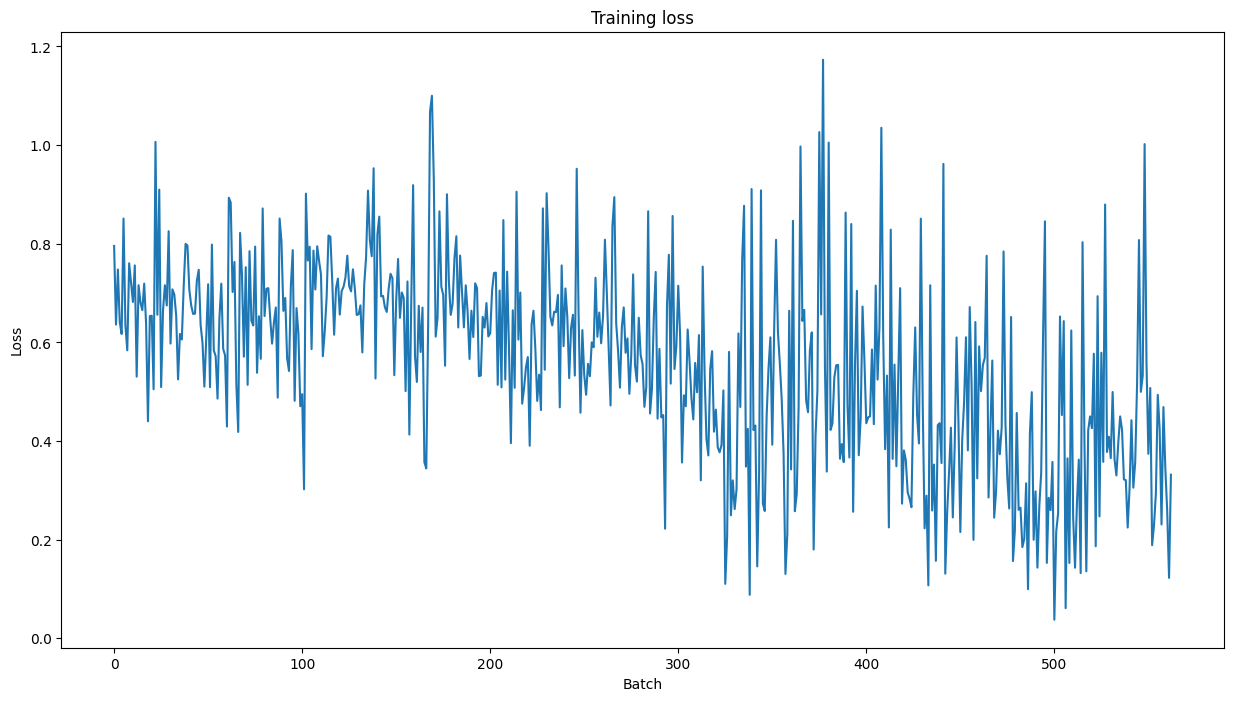

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [ ]:
print(train_loss_set)

[0.7955557107925415, 0.6361551284790039, 0.7479572296142578, 0.6405811309814453, 0.6172107458114624, 0.8511326313018799, 0.6349664330482483, 0.5839971899986267, 0.7605407238006592, 0.7207387089729309, 0.682104229927063, 0.7562086582183838, 0.5306448936462402, 0.7159473299980164, 0.6810219287872314, 0.6654554605484009, 0.7192683219909668, 0.638005256652832, 0.4401819705963135, 0.6534498929977417, 0.6540931463241577, 0.5050479769706726, 1.0066262483596802, 0.6560821533203125, 0.9098057746887207, 0.5094276070594788, 0.6646571755409241, 0.7159094214439392, 0.6748403906822205, 0.8254934549331665, 0.5977471470832825, 0.7077001929283142, 0.697432279586792, 0.6548454165458679, 0.5250635147094727, 0.6172531843185425, 0.6058768033981323, 0.713686466217041, 0.7998492121696472, 0.7965219020843506, 0.7065877914428711, 0.6748049855232239, 0.6578251123428345, 0.6583146452903748, 0.7252753973007202, 0.7472589612007141, 0.6353396773338318, 0.5994361639022827, 0.5104407668113708, 0.6100005507469177, 0.7

In [ ]:
pickle_file_path = '/content/drive/MyDrive/'
with open(pickle_file_path+"model.pkl", 'wb') as f:
    pickle.dump(model, f)

In [ ]:
pickle_file_path = '/content/drive/MyDrive/'
with open(pickle_file_path+"model.pkl", 'rb') as f:
    model = pickle.load(f)

In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=Fa

In [ ]:
dev_set

,text,label,model,source,id
0,Giving gifts should always be enjoyable. Howe...,1,bloomz,wikihow,0
1,Yveltal (Japanese: ユベルタル) is one of the main a...,1,bloomz,wikihow,1
2,If you'd rather not annoy others by being rude...,1,bloomz,wikihow,2
3,If you're interested in visiting gravesite(s) ...,1,bloomz,wikihow,3
4,The following are some tips for becoming succe...,1,bloomz,wikihow,4
...,...,...,...,...,...
4995,The paper deals with an interesting applicatio...,0,human,peerread,4995
4996,This manuscript tries to tackle neural network...,0,human,peerread,4996
4997,The paper introduced a regularization scheme t...,0,human,peerread,4997
4998,Inspired by the analysis on the effect of the ...,0,human,peerread,4998


In [ ]:
print(len(dev_set["text"]))

5000


In [ ]:
# df = pd.read_csv("out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Create sentence and label lists
sentences = dev_set["text"]

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence[:510] + " [SEP]" for sentence in sentences]
labels = dev_set["label"].tolist()

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]


MAX_LEN = 512

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

batch_size = 8


prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

100%|██████████| 231508/231508 [00:00<00:00, 1286189.15B/s]


In [ ]:
# Prediction on test set

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
    # Forward pass, calculate logit predictions
    logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

In [ ]:
pickle_file_path = '/content/drive/MyDrive/'
with open(pickle_file_path+"output_val.pkl", 'wb') as f:
    pickle.dump(predictions, f)

In [ ]:
pickle_file_path = '/content/drive/MyDrive/'
with open(pickle_file_path+"output_test.pkl", 'wb') as f:
    pickle.dump(predictions, f)

In [ ]:
pickle_file_path = '/content/drive/MyDrive/'
with open(pickle_file_path+"output_test.pkl", 'rb') as f:
    predictions = pickle.load(f)

In [ ]:
df = pd.DataFrame({'id': range(0, len(predictions)), 'label': test_set["label"], 'prediction': predictions})
df.to_csv('bertz_test_output.csv')

In [ ]:
import pickle
pickle_file_path = '/content/drive/MyDrive/'
with open(pickle_file_path+"output_val.pkl", 'rb') as f:
    predictions = pickle.load(f)

In [ ]:
dev_set["label"]

0       1
1       1
2       1
3       1
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: label, Length: 5000, dtype: int64

In [ ]:
df = pd.DataFrame({'id': range(0, len(predictions)), 'label': dev_set["label"], 'prediction': predictions})
df.to_csv('bertz_dev_output.csv')

In [ ]:
predicted=[]
for x in predictions:
  for y in x:
    predicted.append(y)

print(len(predicted))
print(len(labels))

5000
5000


In [ ]:
predictions = np.argmax(predicted, axis=1).flatten()
print(predictions[0])

0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = calculate_metrics(labels, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


ValueError: ignored

In [ ]:
# Import and evaluate each test batch using Matthew's correlation coefficient
from sklearn.metrics import matthews_corrcoef
matthews_set = []

for i in range(len(true_labels)):
  matthews = matthews_corrcoef(true_labels[i],
                 np.argmax(predictions[i], axis=1).flatten())
  matthews_set.append(matthews)

In [ ]:
matthews_set

[0.6,
 0.4472135954999579,
 0.2581988897471611,
 0.7453559924999299,
 1.0,
 1.0,
 1.0,
 0.7745966692414834,
 0.4666666666666667,
 1.0,
 0.7745966692414834,
 1.0,
 1.0,
 0.7745966692414834,
 0.4879500364742666,
 1.0,
 0.7453559924999299,
 1.0,
 0.4666666666666667,
 1.0,
 0.4879500364742666,
 0.7745966692414834,
 1.0,
 1.0,
 0.7745966692414834,
 0.7745966692414834,
 0.5773502691896258,
 0.4879500364742666,
 1.0,
 1.0,
 0.7745966692414834,
 1.0,
 1.0,
 1.0,
 1.0,
 0.7453559924999299,
 0.7745966692414834,
 1.0,
 0.7745966692414834,
 0.6546536707079772,
 0.7745966692414834,
 0.7745966692414834,
 0.7745966692414834,
 0.6,
 0.7453559924999299,
 0.14907119849998599,
 1.0,
 0.5773502691896258,
 1.0,
 0.7745966692414834,
 0.6,
 0.3779644730092272,
 1.0,
 0.7745966692414834,
 0.7745966692414834,
 1.0,
 0.6,
 1.0,
 0.7745966692414834,
 0.5773502691896258,
 1.0,
 1.0,
 0.7453559924999299,
 0.6,
 0.3333333333333333,
 1.0,
 1.0,
 0.7453559924999299,
 0.5773502691896258,
 1.0,
 0.6546536707079772,
 0.

In [ ]:
# Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]


In [ ]:
matthews_corrcoef(flat_true_labels, flat_predictions)

0.8144949131156882

In [ ]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 1            |        cudaMalloc retries: 1         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  13855 MiB |  13951 MiB |  25123 MiB |  11267 MiB |
|       from large pool |  13854 MiB |  13950 MiB |  25086 MiB |  11232 MiB |
|       from small pool |      1 MiB |      2 MiB |     36 MiB |     35 MiB |
|---------------------------------------------------------------------------|
| Active memory         |  13855 MiB |  13951 MiB |  25123 MiB |  11267 MiB |
|       from large pool |  13854 MiB |  13950 MiB |  25086 MiB |